In [2]:
import pandas as pd
import numpy as np


import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/CSV/spam.csv', encoding='latin-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
213,ham,Yup... How Ì_ noe leh...,NaN,NaN,NaN
1853,ham,I just made some payments so dont have that mu...,NaN,NaN,NaN
4338,ham,Just got outta class gonna go gym.,NaN,NaN,NaN
2418,ham,"Madam,regret disturbance.might receive a refer...",NaN,NaN,NaN
5400,ham,HARD BUT TRUE: How much you show &amp; expres...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# Data cleaning
# EDA
# Text preprocessing
# Model building
# Evalution
# Improvement
# Website

## Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [10]:
df.sample(2)

,v1,v2
3353,ham,R u sure they'll understand that! Wine * good ...
273,ham,"Usf I guess, might as well take 1 car"


In [11]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [12]:
df.sample(5)

,target,text
3426,ham,Haha okay... Today weekend leh...
4410,ham,Ya but it cant display internal subs so i gott...
4147,spam,Please call Amanda with regard to renewing or ...
3661,ham,"What are you doing in langport? Sorry, but I'l..."
3155,ham,Long time. You remember me today.


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target']= encoder.fit_transform(df['target'])

In [15]:
df.isnull().sum()  # No missimg values in the dataset

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df= df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum() # All the duplicates records are removed

0

In [19]:
df.shape

(5169, 2)

## EDA

In [20]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

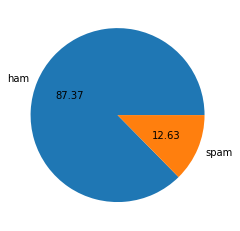

In [21]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
3903,1,Your 2004 account for 07XXXXXXXXX shows 786 un...,128,20,2
2615,0,2marrow only. Wed at &lt;#&gt; to 2 aha.,42,16,2
5147,1,Get your garden ready for summer with a FREE s...,156,28,2
5094,0,"Hi Shanil,Rakhesh here.thanks,i have exchanged...",120,22,2
254,0,"I'm back, lemme know when you're ready",38,11,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


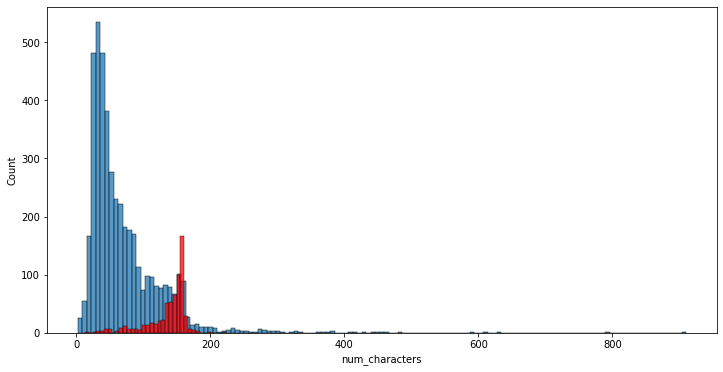

In [31]:
import seaborn as sns
#number of characters in spam vs ham
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

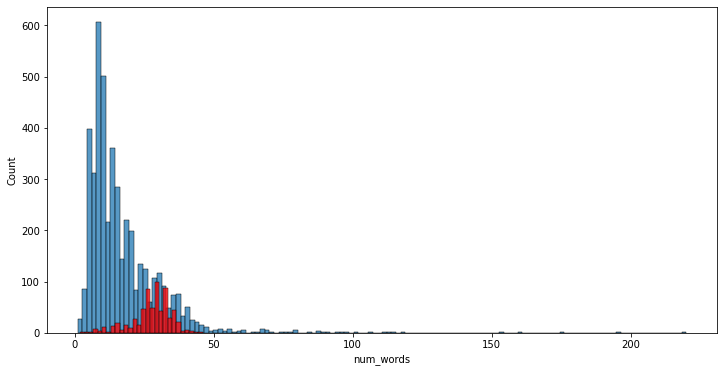

In [32]:
#number of wordss in spam vs ham
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

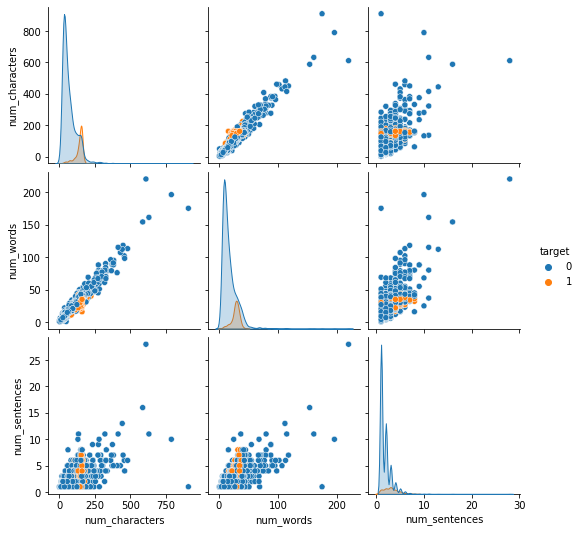

In [33]:
sns.pairplot(df, hue='target')

- Data has outliers.

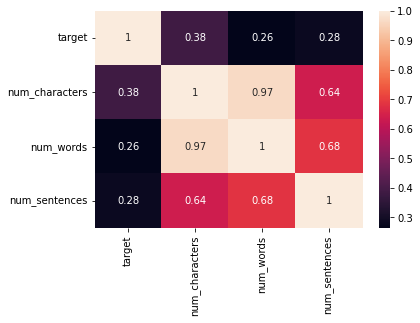

In [34]:
sns.heatmap(df.corr(), annot=True)

- Data has multicollinearity.
- we will keep 'num_characters' and will drop 'num_words' and 'num_sentences'.

## Data Preprocessing

- lower case.
- Tokenization.
- Removing special characters.
- Removing stopwords and punctuations.
- stemming.

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [37]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [38]:

ps.stem('dancing')

'danc'

In [39]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
# We will apply our funtion on 'text' and assign it to new column
df['transformed_text']= df['text'].apply(transform_text)

In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [42]:
# Most frequent Spam and Ham texts
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

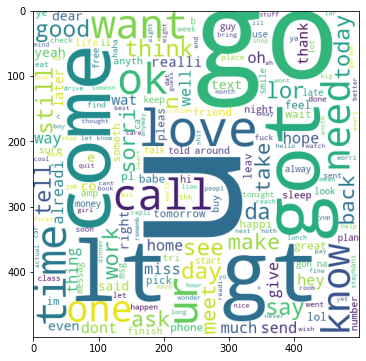

In [43]:
# Display most frequent  spam texts
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

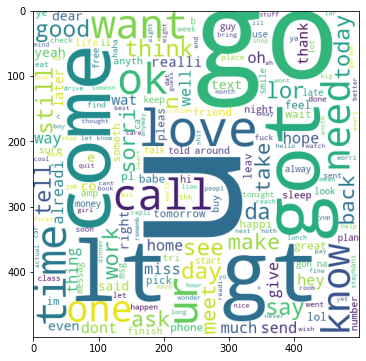

In [44]:
# Display most frequent Ham texts
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [45]:
# Additional steps
# Top 30 frequent spam text
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

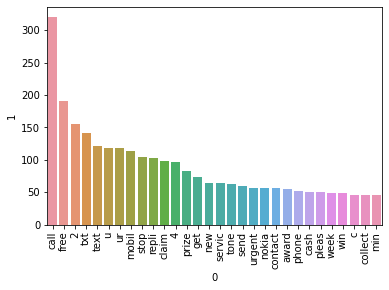

In [47]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [48]:
# Top 30 frequent spam text
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [49]:
len(ham_corpus)

35394

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

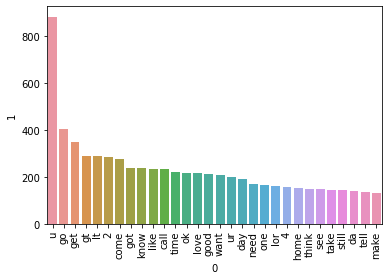

In [50]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

## Model Building

In [73]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [88]:
X = tfidf.fit_transform(df['transformed_text']).toarray()   #Sparse to Dense array

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [89]:
X.shape

(5169, 3000)

In [90]:
y= df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [92]:
#TrainTestSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [93]:
# Using naive bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [94]:
#create objects using these three 
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [95]:
# GaussionNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [96]:
# MultinomialNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [97]:
# BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [62]:
# tfidf --> mnb

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [99]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [100]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost': abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
    
}

In [101]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy,precision

In [102]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [103]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For",name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For xgb
Accuracy -  0.9439071566731141
Precision -  0.9347826086956522


In [69]:
performance_df = pd.DataFrame({"Algorithm": clfs.keys(),
                               "Accuracy": accuracy_scores,
                               "Precision": precision_scores}).sort_values('Precision', ascending=False)

In [70]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
10,xgb,0.950677,0.922330
7,BgC,0.958414,0.862595


In [71]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,xgb,Accuracy,0.950677
9,BgC,Accuracy,0.958414


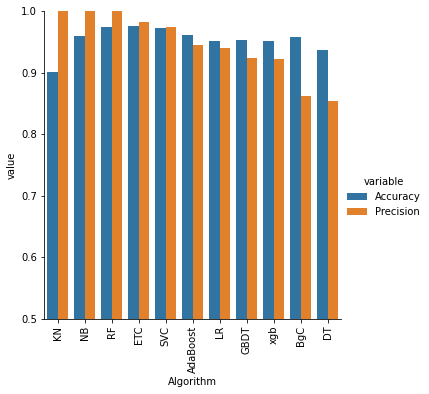

In [72]:
sns.catplot(x='Algorithm', y='value', hue='variable',
            data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [105]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,GBDT,0.952611,0.923810,0.947776,0.920000
8,xgb,0.950677,0.922330,0.943907,0.934783
9,BgC,0.958414,0.862595,0.957447,0.867188


In [ ]:
#new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:
#new_df_scaled.merge(temp_df,on='Algorithm')

In [79]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [80]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [81]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [82]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9915254237288136


In [83]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [84]:
from sklearn.ensemble import StackingClassifier

In [85]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [86]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


We will use the tfidf vectorizer and the MultiNB model(mnb).

In [87]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))